                                                                                                                       
## Lab 1: Part A: Linear Regression 
To accompany the slide deck intro_2019

### Devika Subramanian, ML Bootcamp, (c) 2019.

### Instructions

You are given a gradient descent implementation of linear regression and you will compare it with  sklearn's linear regression  to predict the median value of a home in
a census tract in the Boston suburbs from the percentage of the population in the census tract
that is of lower economic status.  This notebook
has already been set up to load this data for you using the Python package pandas. For
a quick introduction to this package, read the python_for_ml.pdf slide deck and the python notebook python_for_ml_ipynb.

### Reading data and plotting
Before starting on any task, it is often useful to understand the data by visualizing it. For this
dataset, you can use a scatter plot to visualize the data, since it has only two features to plot
(percentage of population of lower economic status and median home value). Many other problems
that you will encounter in real life are multi-dimensional and cannot be plotted on a 2-d plot. We have loaded the predictor variable and predicted variables in X and y. 

Reading data ...
Plotting data ...


Text(0, 0.5, 'Median home value in $10000s')

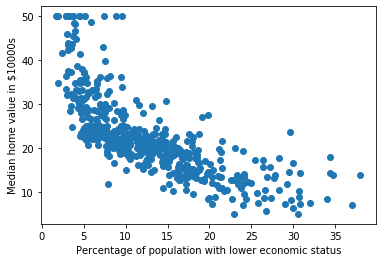

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

print('Reading data ...')
bdata = load_boston()
df = pd.DataFrame(data = bdata.data, columns = bdata.feature_names)

#  X is the percentage of the population in a census tract that is of
#  lower economic status. X is a vector of length 506.
#  y is to the median home value in $10000's. y is a vector of length 506

X = df.LSTAT
y = bdata.target

# Scatter plot LSTAT vs median home value, shown interactively 

print('Plotting data ...')
plt.scatter(X,y)
plt.xlabel('Percentage of population with lower economic status')
plt.ylabel('Median home value in $10000s')


### Training a regression model by gradient descent
Here are two functions: one for calcuating the loss $J(\theta)$, and the other to perform gradient descent in the $\theta$ space. Remember that the variables X and y are not scalar values, but matrices whose rows represent the
examples from the training set. A good way to verify that gradient
descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each
step. The train method calls the loss method on every iteration and prints the cost. If gradient descent and the loss function are implemented correctly, your value of $J(\theta)$
should never increase, and should converge to a steady value by the end of the algorithm. 

In [2]:
import numpy as np

class LinearRegressor:

    def __init__(self):
        self.theta = None


    def train(self,X,y,learning_rate=1e-3, reg=1e-5,num_iters=100,verbose=False):

        """
        Train a linear model using gradient descent.
        
        Inputs:
        - X: N X 1 array of training data. 
        - y: 1-dimensional array of length N with values in the reals.
        - learning_rate: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - num_iters: (integer) number of steps to take when optimizing
        - verbose: (boolean) If true, print progress during optimization.

        Outputs:
        A list containing the value of the loss function at each training iteration.
        """
    
        J_history = []

        # Initialize self.theta
        if self.theta is None:
            # lazily initialize theta 
            self.theta = np.zeros((X.shape[1],))

        # Run gradient descent to find theta
        for i in range(num_iters):
            # evaluate loss and gradient
            loss, grad = self.loss(X, y, reg)

            # add loss to J_history
            J_history.append(loss)
            
            # perform parameter update
            self.theta = self.theta - learning_rate * grad 

            # print loss every 1000 iterations
            if verbose and i % 1000 == 0:
                print('iteration %d / %d: loss %f' % (i, num_iters, loss))

        return J_history

    def loss(self, X, y, reg):
        """
        Compute the loss function and its derivative. 
        Subclasses will override this.

        Inputs:
        - X: vector of length N with real values
        - y: 1-dimensional array of length N with real values.
        - reg: (float) regularization strength.

        Returns: A tuple containing:
        - loss as a single float
        - gradient with respect to self.theta; an array of the same shape as theta
        """
        pass

    def predict(self, X):
        """
        Use the trained weights of this linear classifier to predict labels for
        data points.

        Inputs:
        - X: vector of length N of training data. 

        Returns:
        - y_pred: Predicted output for the data in X. y_pred is a 1-dimensional
        array of length N, and each element is a real number.
        """
        y_pred = np.dot(X.T,self.theta)
        
        return y_pred
    
    
class LinearReg_SquaredLoss(LinearRegressor):
    "A subclass of Linear Regressors that uses the squared error loss function """

    """
    Function that returns loss and gradient of loss with respect to (X, y) and
    self.theta
        - loss J is a single float
        - gradient with respect to self.theta is an array of the same shape as theta

    """

    def loss (self,X,y,reg):
        J = 0
        grad = np.zeros((2,))
        
        num_examples = X.shape[0]
        error = np.dot(X,self.theta)- y
        J = np.dot(error,error)/(2*num_examples)
        grad = np.dot(X.T,error)/num_examples
        
        return J, grad



### Run gradient descent to fit a model
You
should expect to see a cost of approximately 296.07 at the first iteration. After you are finished,
the script below will use your final parameters to plot the linear fit.  

iteration 0 / 10000: loss 296.073458
iteration 1000 / 10000: loss 32.190429
iteration 2000 / 10000: loss 20.410446
iteration 3000 / 10000: loss 19.347011
iteration 4000 / 10000: loss 19.251010
iteration 5000 / 10000: loss 19.242344
iteration 6000 / 10000: loss 19.241561
iteration 7000 / 10000: loss 19.241491
iteration 8000 / 10000: loss 19.241484
iteration 9000 / 10000: loss 19.241484
Theta found by gradient_descent:  [34.55363411 -0.95003694]


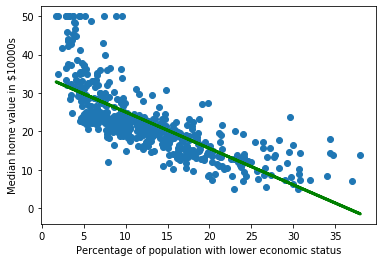

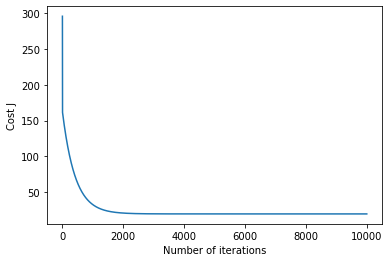

In [3]:
# Predict median home value from percentage of lower economic status in a census tract

# add the column of ones to X to represent the intercept term
XX = np.vstack([np.ones((X.shape[0],)),X]).T

# set up a linear regression model

linear_reg = LinearReg_SquaredLoss()

# run gradient descent

J_history = linear_reg.train(XX,y,learning_rate=0.005,num_iters=10000,verbose=True)



# plot the linear fit and save it in fig2.pdf
plt.scatter(X,y)
plt.xlabel('Percentage of population with lower economic status')
plt.ylabel('Median home value in $10000s')
plt.plot(X, np.dot(XX,linear_reg.theta), 'g-',linewidth=3)

# Plot the convergence graph and save it in fig3.pdf
plt.figure()
plt.plot(range(len(J_history)),J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# print the theta found

print('Theta found by gradient_descent: ',linear_reg.theta)

### Qualitative analysis of the linear fit
What can you say about the quality of the linear fit for this data?  How you expect the model to perform at the low and high ends of values for LSTAT? How could we improve the quality of the fit?

### Predicting on unseen data with the model
Your final values for $\theta$ will also be used to make predictions on median home values for census
tracts where the percentage of the population of lower economic status is 5% and 50%. We use the predict method in the LinearRegressor class in the cell above. 

In [4]:
# Predict values for lower status percentage of 5% and 50%
# remember to multiply prediction by 10000 because median value is in 10000s

#   Predicted median value of a home with LSTAT = 5%                     
pred_cost = linear_reg.predict(np.array([1,5])) * 10000
print('For lower status percentage = 5, we predict a median home value of', pred_cost)

#   Predicted median value of a home with LSTAT = 50%                     

pred_cost = linear_reg.predict(np.array([1,50])) * 10000
print('For lower status percentage = 50, we predict a median home value of',pred_cost)

For lower status percentage = 5, we predict a median home value of 298034.4941220727
For lower status percentage = 50, we predict a median home value of -129482.1288979854


### Visualizing $J(\theta_0,\theta_1)$
To understand the cost function $J(\theta_0,\theta_1)$ better, we plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$
values.  In the script below, we calculate $J(\theta_0,\theta_1)$ over a grid of
$(\theta_0,\theta_1)$ values using the squared error loss function. The 2-D array of $J(\theta_0,\theta_1)$ values is plotted using
the surf and contour commands of matplotlib. 
The purpose of these plots is to show you how $J(\theta_0,\theta_1)$ varies with changes in $\theta_0$ and $\theta_1$. The cost
function is bowl-shaped and has a global minimum. This is easier to see in the contour plot than
in the 3D surface plot. This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient
descent moves closer to this point.

Visualizing J(theta_0, theta_1) ...


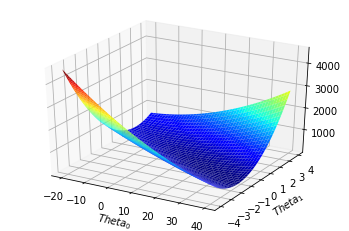

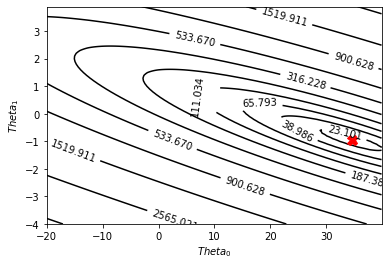

In [5]:
print('Visualizing J(theta_0, theta_1) ...')

# Compute grid over which we will calculate J

theta0_vals = np.arange(-20,40, 0.1);
theta1_vals = np.arange(-4, 4, 0.1);
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

# Fill out J_vals 

linear_reg2 = LinearReg_SquaredLoss()

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        linear_reg2.theta = (theta0_vals[i],theta1_vals[j])
        J_vals[i,j],_ = linear_reg2.loss(XX,y,0)
          
# Surface and contour plots

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

def make_surface_plot(X,Y,Z,xlabel,ylabel):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(X, Y, Z,cmap=cm.jet)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);


def make_contour_plot(X,Y,Z,levels,xlabel,ylabel,theta):
    plt.figure()
    CS = plt.contour(X, Y, Z,levels=levels,colors='k')    
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot([theta[0]],[theta[1]], marker='X',color='r',markersize=10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

# Need to transpose J_vals before calling plot functions

J_vals = J_vals.T
tt1,tt2 = np.meshgrid(theta0_vals,theta1_vals)

make_surface_plot(tt1,tt2,J_vals,'$Theta_0$','$Theta_1$')

make_contour_plot(tt1,tt2,J_vals,np.logspace(-5,5,45),'$Theta_0$','$Theta_1$',linear_reg.theta)



### Comparing with sklearn's linear regression model

In [6]:
# Check if the model you learned using gradient descent matches the one
# that sklearn's linear regression model learns on the same data.

from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(XX,y)

print("The coefficients computed by sklearn: ", lr.intercept_, " and ", lr.coef_[1])
print("The coefficients of our own model:", linear_reg.theta)

The coefficients computed by sklearn:  34.55384087938311  and  -0.9500493537579912
The coefficients of our own model: [34.55363411 -0.95003694]
